In [1]:
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline 

In [2]:
X,y = make_blobs(n_samples=1000,centers = 3,n_features=2)

In [3]:
X

array([[ 0.21341111, 10.31936788],
       [ 6.52212754,  0.74602211],
       [ 0.02634708,  8.68224661],
       ...,
       [ 7.65056103,  2.90952084],
       [ 0.05999014,  8.52415934],
       [ 1.94650387, 11.18720765]])

In [4]:
y

array([1, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 1, 2, 0,
       0, 0, 2, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 2, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1, 2,
       0, 2, 1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 1, 0, 2, 0, 2, 0,
       0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 2, 1,
       0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 1, 1,
       0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 1, 0, 1, 2,
       1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2, 2,
       1, 0, 2, 1, 2, 1, 1, 0, 0, 2, 2, 1, 2, 1, 2, 0, 1, 0, 0, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 2, 0, 0,
       2, 0, 0, 2, 2, 1, 1, 2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 0, 2, 2, 2, 1,
       1, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2,
       2, 2, 1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 0, 1, 1, 2,
       2, 1, 2, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0,

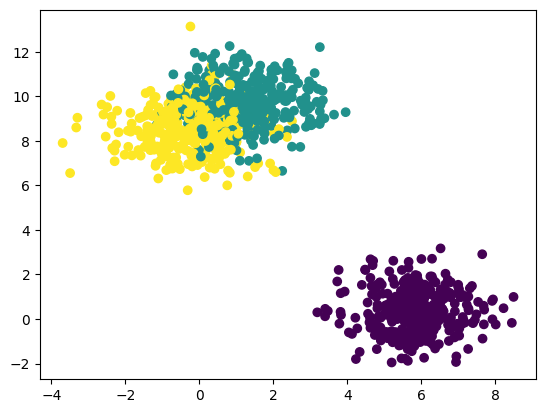

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
# Stansardization --feature scaling technique
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split


In [9]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size = 0.33,random_state=42
)

In [10]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
# Elbow method To select K Value 
wcss =[]
for k in range(1,11):
        kmeans = KMeans(n_clusters=k,init = "k-means++")
        kmeans.fit(X_train_scaled)
        wcss.append(kmeans.inertia_)

In [13]:
wcss

[1340.0000000000007,
 162.3735322774466,
 100.80137182775604,
 84.47671950611594,
 70.5847557857825,
 58.24322386562691,
 51.78172471620158,
 47.89284824719835,
 41.71856636151449,
 38.50471689302085]

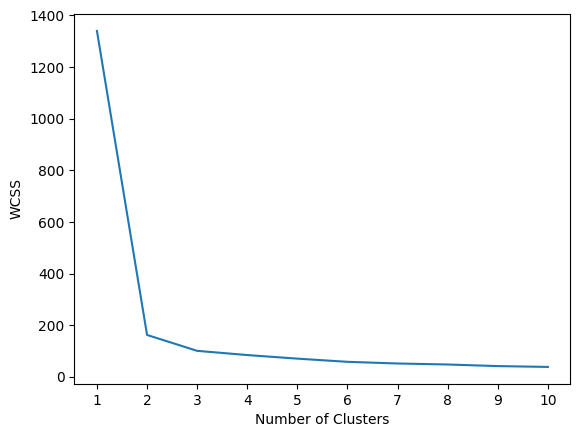

In [14]:
# Plot the Elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [15]:
kmeans = KMeans(n_clusters = 3,init="k-means++")


In [16]:
kmeans.fit_predict(X_train_scaled)


array([1, 1, 2, 1, 2, 2, 2, 0, 2, 0, 2, 1, 1, 0, 1, 1, 2, 2, 2, 1, 2, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 2, 1, 2, 2, 1, 2, 1, 0,
       0, 0, 1, 2, 1, 2, 2, 0, 1, 1, 0, 2, 0, 1, 0, 1, 0, 0, 2, 0, 1, 0,
       1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 2, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 0, 0,
       0, 2, 1, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0,
       1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0,
       2, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       2, 1, 1, 2, 0, 2, 2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 2, 1,
       1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 1, 1, 1,
       0, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 2, 0, 0, 0, 2, 1, 0,
       1, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0,

In [17]:
y_pred = kmeans.predict(X_test_scaled)

In [18]:
y_pred

array([1, 1, 2, 0, 2, 0, 0, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 0,
       2, 2, 1, 1, 2, 1, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0,
       1, 2, 1, 0, 2, 1, 1, 1, 0, 1, 2, 2, 0, 2, 1, 0, 1, 0, 0, 2, 1, 1,
       1, 0, 2, 1, 0, 1, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0,
       2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 1, 2,
       2, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 1, 2, 1, 0, 2, 2,
       1, 0, 0, 2, 0, 2, 2, 1, 2, 1, 0, 0, 0, 1, 2, 0, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2,
       0, 0, 2, 0, 1, 0, 1, 2, 0, 2, 0, 2, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0,
       0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 2,
       1, 0, 2, 1, 2, 0, 2, 2, 1, 0, 1, 0, 0, 1, 2, 2, 1, 2, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 0,

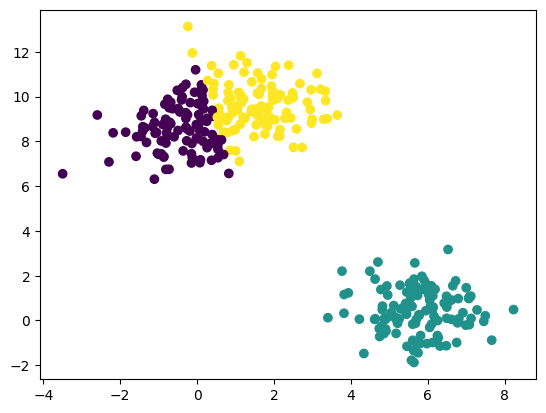

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [20]:
# Validating the k value
# Use Kneelocater
!pip install kneed
# Use silhoutee scoring 


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
from kneed import KneeLocator


In [22]:
kl = KneeLocator(range(1,11),wcss,curve="convex",direction = "decreasing")

In [23]:
kl.elbow

np.int64(2)

In [24]:
# Silhoutte score
from sklearn.metrics import silhouette_score

In [26]:
silhouette_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

In [27]:
silhouette_coefficients

[0.7874254009709468,
 0.5380125830470788,
 0.4810504675522013,
 0.37813858304369635,
 0.3418695496056081,
 0.3267419639177606,
 0.32226485361700746,
 0.32272199824110487,
 0.3262451711269105]

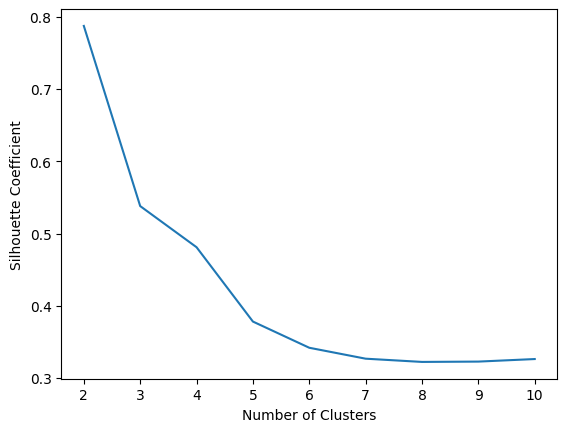

In [28]:
# plotting silhouette score 
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()